In [28]:
import pandas as pd

In [29]:
df=pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [30]:
df = df.drop_duplicates(subset=df.columns.drop('id'), keep='last')


In [31]:
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

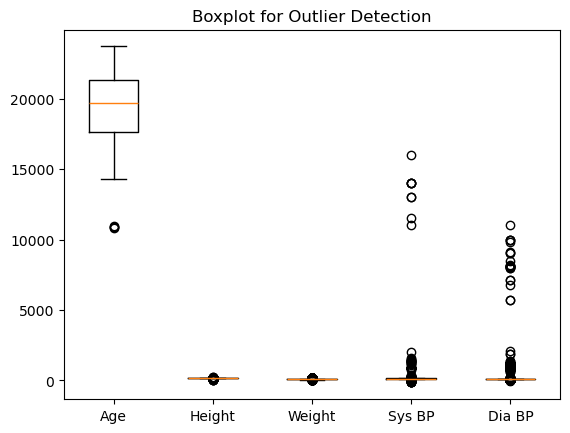

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(df[['age','height','weight','ap_hi','ap_lo']])
plt.xticks([1,2,3,4,5], ['Age','Height','Weight','Sys BP','Dia BP'])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [33]:
df.shape

(69976, 13)

In [34]:
# Detect outliers

# Using IQR

# Using Z-score

# Using boxplots
#frist we convert age days to year
import numpy as np

df['age'] = np.floor(df['age'] / 365)



In [35]:
print("Age valid:", ((df['age'] > 0) & (df['age'] <= 100)).sum())
print("Height valid:", ((df['height'] > 100) & (df['height'] <= 250)).sum())
print("Weight valid:", ((df['weight'] > 20) & (df['weight'] <= 200)).sum())
print("Sys BP valid:", ((df['ap_hi'] >= 60) & (df['ap_hi'] <= 240)).sum())
print("Dia BP valid:", ((df['ap_lo'] >= 40) & (df['ap_lo'] <= 140)).sum())

print("Total rows:", len(df))


Age valid: 69976
Height valid: 69944
Weight valid: 69974
Sys BP valid: 69748
Dia BP valid: 68934
Total rows: 69976


In [36]:
df = df[
    (df['age'] >= 1) &
    (df['height'] > 0) &
    (df['weight'] > 0) 
]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [37]:
df = df[
    (df['ap_hi'] >= 50) & (df['ap_hi'] <= 700) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 700) &
    (df['ap_hi'] > df['ap_lo'])
]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


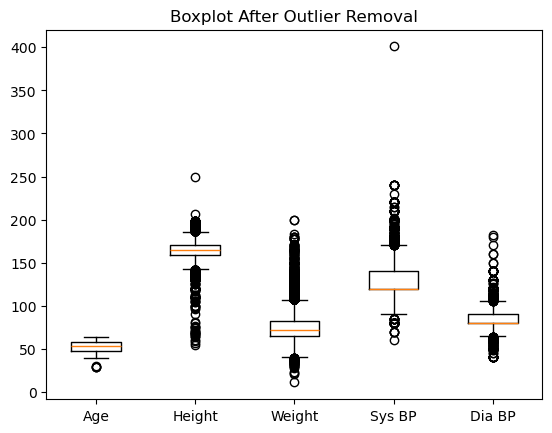

In [38]:
import matplotlib.pyplot as plt

plt.boxplot(df[['age','height','weight','ap_hi','ap_lo']])
plt.xticks([1,2,3,4,5], ['Age','Height','Weight','Sys BP','Dia BP'])
plt.title("Boxplot After Outlier Removal")
plt.show()


Iden fy and handle outliers. 


Iden fy and handle outliers. 


Normalize / Scale Numerical Features

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], drop_first=True)





In [13]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,50.0,1,168,62.0,110,80,0,0,1,0,False,False,False,False
1,1,55.0,0,156,85.0,140,90,0,0,1,1,False,True,False,False
2,2,51.0,0,165,64.0,130,70,0,0,0,1,False,True,False,False
3,3,48.0,1,169,82.0,150,100,0,0,1,1,False,False,False,False
4,4,47.0,0,156,56.0,100,60,0,0,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,1,168,76.0,120,80,1,0,1,0,False,False,False,False
69996,99995,61.0,0,158,126.0,140,90,0,0,1,1,True,False,True,False
69997,99996,52.0,1,183,105.0,180,90,0,1,0,1,False,True,False,False
69998,99998,61.0,0,163,72.0,135,80,0,0,0,1,False,False,True,False


Visualize Numerical Features (EDA)

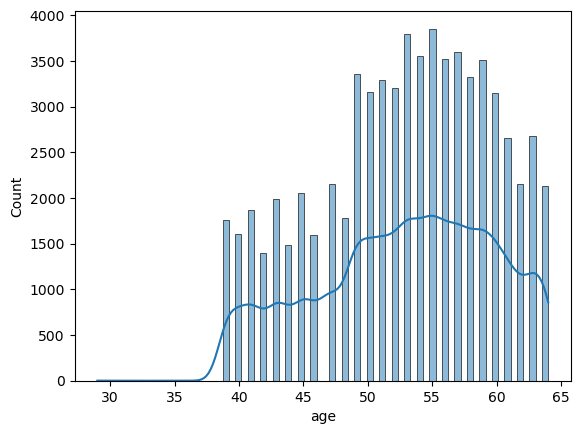

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['age'], kde=True)
plt.show()

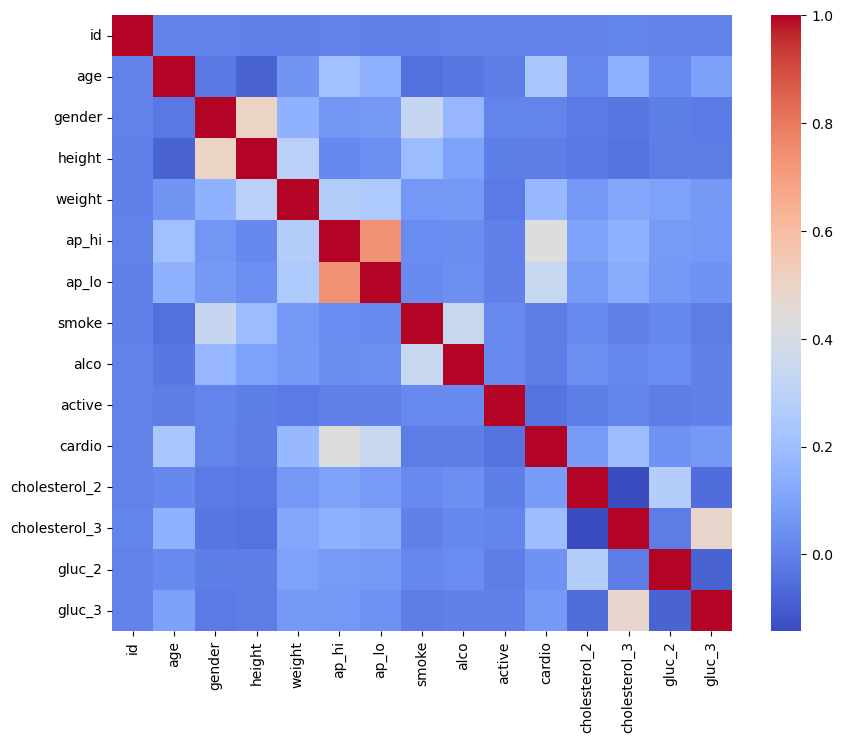

In [14]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


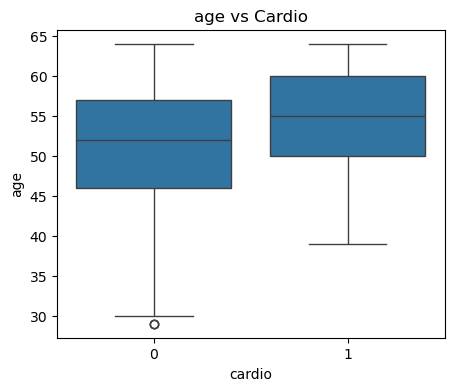

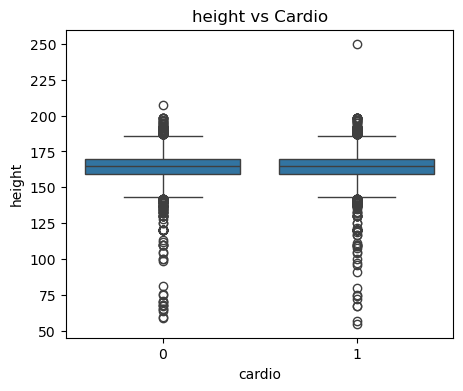

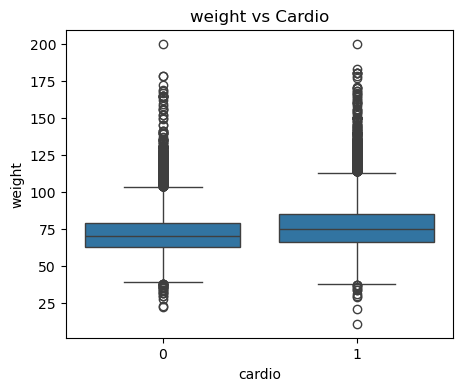

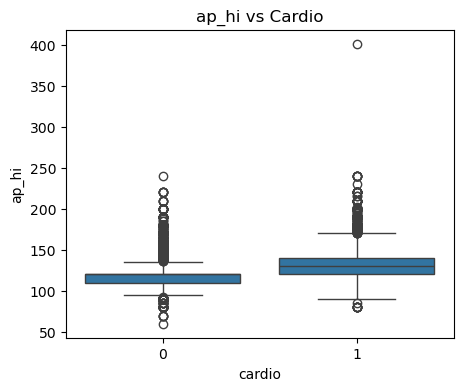

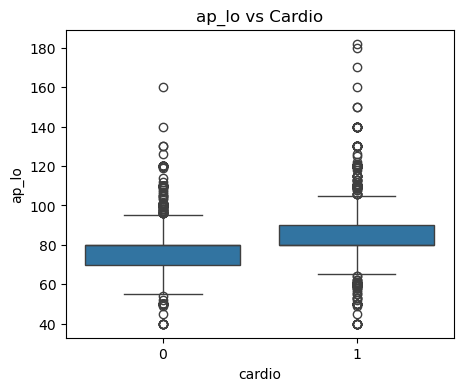

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cat_cols = ['gender', 'smoke', 'alco', 'active',
            'cholesterol_2', 'cholesterol_3',
            'gluc_2', 'gluc_3']
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='cardio', y=col, data=df)
    plt.title(f'{col} vs Cardio')
    plt.show()


In [39]:
df.to_csv('cardio_train_cleaned.csv')